In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
meme_data  = pd.read_csv('memegenerator.csv') # reading csv file

In [ ]:
meme_data.head()

,ID_Of_Meme,URL_Archived,Name_Of_Meme,URL_Of_Meme,MD5_Hash,Size_Of_File_In_Bytes,Alternative_Text
0,10509464,http://webarchive.loc.gov/all/19960101000000-2...,Spiderman Approves,http://memegenerator.net/instance/10509464,5be4b65cc32d3a57be5b6693bb519155,24093.0,seems legit
1,12285257,http://webarchive.loc.gov/all/19960101000000-2...,Alright Then Business Kid,http://memegenerator.net/instance/12285257,e2eef6626b3fdb369df23a5fabd99df4,25513.0,Fret not I stayed at a Holiday Inn Express las...
2,20612245,http://webarchive.loc.gov/all/19960101000000-2...,Archer,http://memegenerator.net/instance/20612245,a6b7db4574325013f05bf1aabdcaeded,31157.0,"hello airplanes? yeah, this is blimps. Yeah, y..."
3,20614628,http://webarchive.loc.gov/all/19960101000000-2...,Futurama Fry,http://webarchive.loc.gov/all/0/http://memegen...,be75a0451f607d65df43813257d90f7a,50056.0,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4,24194267,http://webarchive.loc.gov/all/19960101000000-2...,One Does Not Simply,http://memegenerator.net/instance/24194267,2437b5ae9c4741c2e6f249f3f731dee2,24209.0,one does not simply put toothpaste back in th...


In [ ]:
meme_data.info() #infromation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57652 entries, 0 to 57651
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Of_Meme             57652 non-null  object 
 1   URL_Archived           57652 non-null  object 
 2   Name_Of_Meme           57645 non-null  object 
 3   URL_Of_Meme            57377 non-null  object 
 4   MD5_Hash               57644 non-null  object 
 5   Size_Of_File_In_Bytes  57644 non-null  float64
 6   Alternative_Text       57347 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
meme_data.isnull().sum()

,0
ID_Of_Meme,0
URL_Archived,0
Name_Of_Meme,7
URL_Of_Meme,275
MD5_Hash,8
Size_Of_File_In_Bytes,8
Alternative_Text,305


In [ ]:
dd = meme_data.drop(['URL_Archived','Name_Of_Meme','MD5_Hash','Size_Of_File_In_Bytes'],axis=1)# Removing unnecessary columns that are not relevant for sentiment analysis


In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57652 entries, 0 to 57651
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_Of_Meme        57652 non-null  object
 1   URL_Of_Meme       57377 non-null  object
 2   Alternative_Text  57347 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [ ]:
dd.drop_duplicates(inplace=True)

The heatmap provides a clear visual representation of missing data in the dataset. Columns like "Base Meme Name" and "Alternate Text" show noticeable gaps (white streaks), indicating these fields have more missing entries compared to others like "Meme ID" and "Archived URL," which are mostly complete. This highlights the need to focus on these columns for data cleaning or filling in the missing values.

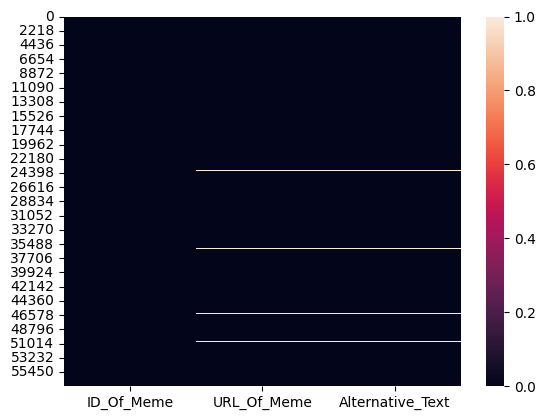

In [ ]:
import seaborn as sb

sb.heatmap(dd.isnull(),cbar=True)
plt.show()

In [ ]:
dd.head()

,ID_Of_Meme,URL_Of_Meme,Alternative_Text
0,10509464,http://memegenerator.net/instance/10509464,seems legit
1,12285257,http://memegenerator.net/instance/12285257,Fret not I stayed at a Holiday Inn Express las...
2,20612245,http://memegenerator.net/instance/20612245,"hello airplanes? yeah, this is blimps. Yeah, y..."
3,20614628,http://webarchive.loc.gov/all/0/http://memegen...,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...
4,24194267,http://memegenerator.net/instance/24194267,one does not simply put toothpaste back in th...


In [ ]:
dd.dropna(inplace=True)

In [ ]:
dd.isnull().sum()

,0
ID_Of_Meme,0
URL_Of_Meme,0
Alternative_Text,0


In [ ]:
drop_data = dd[dd['Alternative_Text'].str.isalnum() == True]
drop_data.count()

,0
ID_Of_Meme,814
URL_Of_Meme,814
Alternative_Text,814


In [ ]:
dd = dd.drop(drop_data.index)

In [ ]:
dd = dd.drop([427,644,646,659,730,820,1270,1271,1553,2814,3765,3787,4342,5401,5970,6360,6429,6741,7571,8997,9932,10222,10708 \
             ,10916,11076,11271,11721,12020,12224,12544,12924,13175,13458,13490,13644,13645,14164,14708,14834,14895,14959,15125,15179,15187])

In [ ]:
df= dd
df.count()

,0
ID_Of_Meme,56482
URL_Of_Meme,56482
Alternative_Text,56482


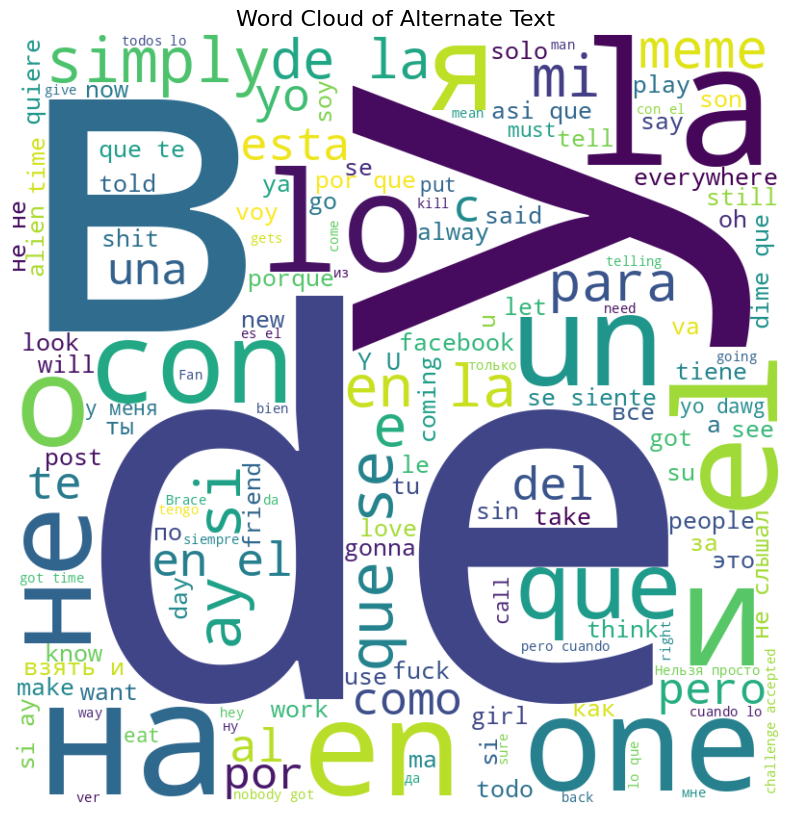

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_data = " ".join(df['Alternative_Text'].tolist())

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    max_words=150,
    colormap='viridis'  # Change the color scheme
).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 10))  # Adjusted figure size
plt.axis('off')  # Turn off axis
plt.imshow(wordcloud, interpolation='bilinear')  # Smoother rendering
plt.title("Word Cloud of Alternate Text", fontsize=16)  # Adding a title
plt.show()

The word cloud represents the most frequent words found in the "Alternate Text" column of the dataset. Larger words appear more often, showing their higher frequency in the text data. Words like "de," "la," and "en" are prominent, suggesting the dataset includes content in multiple languages, particularly Spanish. The word cloud helps visualize the common terms and patterns in the text data, providing insights into the textual themes and their linguistic diversity. This visualization is especially useful for understanding key terms at a glance and identifying trends for further text analysis.

In [ ]:
from tqdm import tqdm

In [ ]:
!pip install googletrans
!pip install contractions

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15719 sha256=9c99424b0e42fcd6a0de8df6c1d85d0413bac005ad019c218fda019274c529f1
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Success

In [ ]:
from googletrans import Translator
trans = Translator(service_urls=[
      'translate.google.com',])

In [ ]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation
import contractions

In [ ]:
#Download Required Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
class TextProcessor:
    def __init__(self, languages):
        self.stopwords = set(stopwords.words(languages))
        self.custom_stops = ["...", "..", "n't", "got", "memegenerator net", "do not", "get"]
        self.stopwords.update(self.custom_stops)
        self.contractions_dict = contractions.contractions_dict
        self.special_terms = ["memegenerator net"]
        self.contractions_re = re.compile('(%s)' % '|'.join(self.contractions_dict.keys()))
        self.special_terms = ["memegenerator net"]
        self.lemmatizer = WordNetLemmatizer()

    def tokenize(self, text):
        return word_tokenize(text.lower())

    def remove_stopwords_and_punctuation(self, tokens):
        return [token for token in tokens if token not in self.stopwords and
                token not in punctuation and len(token) > 2]

    def process_special_terms(self, tokens):
        normal_terms = []
        special_terms = []
        for token in tokens:
            if token in self.special_terms:
                special_terms.append(token)
            else:
                normal_terms.append(token)
        return special_terms, normal_terms

    def expand_contractions(self, text):
        def replace(match):
            return self.contractions_dict.get(match.group(0))
        return self.contractions_re.sub(replace, text)

    def lemmatize_tokens(self, tokens):
        return [self.lemmatizer.lemmatize(token) for token in tokens]

    def process_text(self, text):
        expanded_text = self.expand_contractions(text)
        tokens = self.tokenize(expanded_text)
        filtered_tokens = self.remove_stopwords_and_punctuation(tokens)
        special_terms, normal_tokens = self.process_special_terms(filtered_tokens)
        lemmatized_tokens = self.lemmatize_tokens(normal_tokens)
        return special_terms, lemmatized_tokens

# Usage
languages = ['hungarian','swedish','kazakh','norwegian', \
                             'finnish','arabic','indonesian','portuguese','turkish', \
                            'azerbaijani','slovene','spanish','danish','nepali','romanian','greek',\
                            'dutch','tajik','german','english','russian','french','italian']  # Add more languages as needed
processor = TextProcessor(languages)
df['clean_text'] = df['Alternative_Text'].apply(lambda x: ' '.join(processor.process_text(x)[1]))
print(df['clean_text'])

0                                              seems legit
1                   fret stayed holiday express last night
2                       hello airplane yeah blimp yeah win
3        leg cover hot leg cover cold leg right scared ...
4                          simply put toothpaste back tube
                               ...                        
57647                                     sequeira después
57648                    necrophiliac encounter zombie run
57649            znam internety przyjebe xzibit bez yodawg
57650                            1,006 wait scouter upside
57651                                  iraq going bad time
Name: clean_text, Length: 56482, dtype: object


The TextProcessor class preprocesses text for NLP tasks by handling stopword removal, punctuation cleaning, contraction expansion, tokenization, and lemmatization. It supports multiple languages and processes special terms separately. The process_text method integrates these steps, transforming raw text into clean, standardized tokens. The class is applied to a DataFrame column (Alternative_Text) to create a cleaned version of the text stored in clean_text. This is ideal for preparing multilingual text data for analysis.

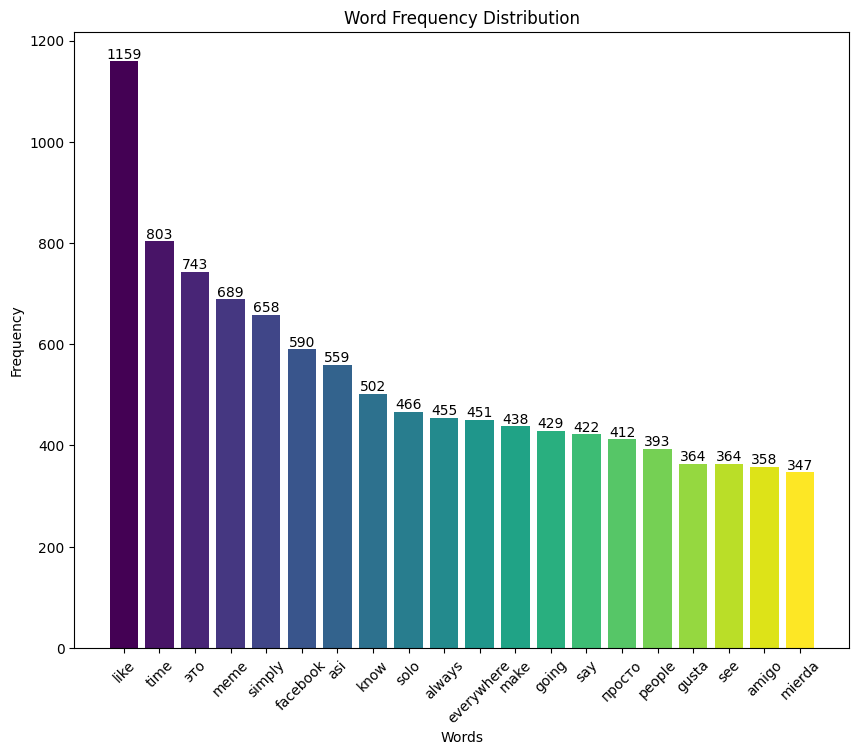

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Join all text entries into a single string
text = " ".join(df['clean_text'].values)

# Tokenize the text by spaces (or you can use a more sophisticated tokenizer if preferred)
words = text.split()

# Count frequencies of each word
word_counts = Counter(words)

# Get the most common words (top 20 for example)
most_common_words = word_counts.most_common(20)

# Preparing data for plotting
words, counts = zip(*most_common_words)  # This unpacks the list of tuples into two tuples

# Creating the bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(words, counts, color=plt.cm.viridis(np.linspace(0, 1, len(counts))))  # Use a colormap for colors

# Add a label above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Set chart title and labels
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer for bigrams with a maximum of 200 features
bigram_count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=200)

# Fit the model and transform the data
Input_bigram = bigram_count_vectorizer.fit_transform(df['clean_text'])

# Convert the matrix of counts to a DataFrame
DTM_bigram = pd.DataFrame(Input_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names_out())

# Output the Document-Term Matrix
print(DTM_bigram)

       000 000  aaaand gone  aaand gone  achievement unlocked  aint nobody  \
0            0            0           0                     0            0   
1            0            0           0                     0            0   
2            0            0           0                     0            0   
3            0            0           0                     0            0   
4            0            0           0                     0            0   
...        ...          ...         ...                   ...          ...   
56477        0            0           0                     0            0   
56478        0            0           0                     0            0   
56479        0            0           0                     0            0   
56480        0            0           0                     0            0   
56481        0            0           0                     0            0   

       alguien quiere  always drink  always use  amigo experto 

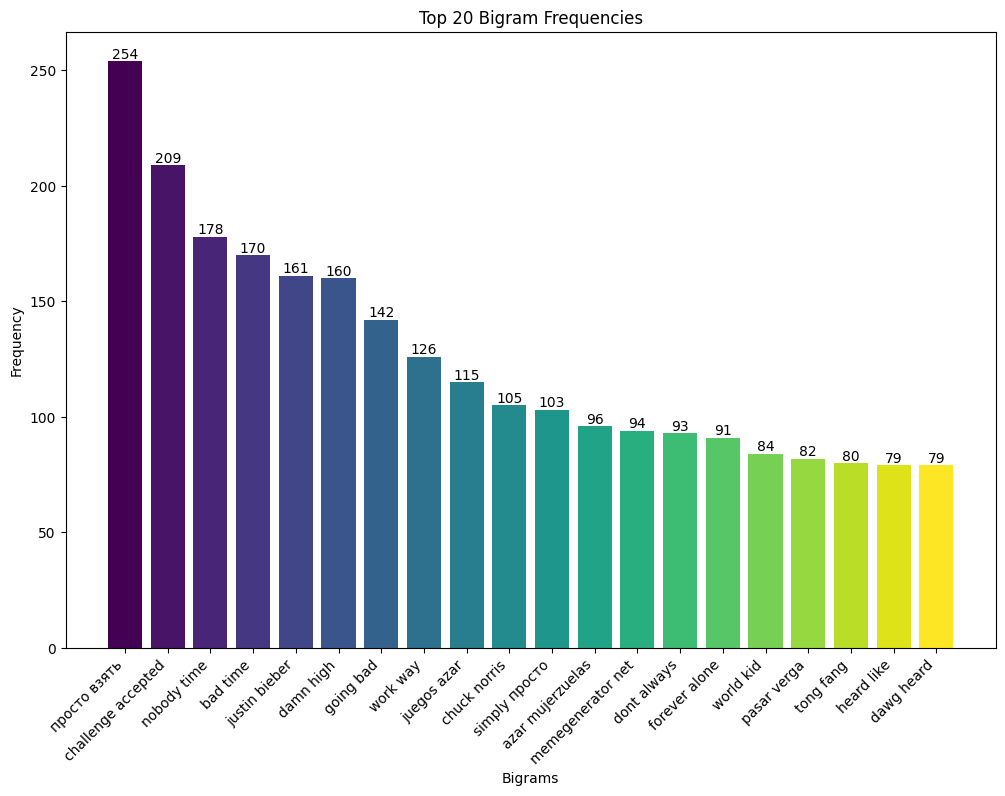

In [ ]:
bigram_frequencies = DTM_bigram.sum().sort_values(ascending=False)

# Initialize a CountVectorizer for bigrams with a maximum of 200 features
bigram_count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=200)

# Fit the model and transform the data
Input_bigram = bigram_count_vectorizer.fit_transform(df['clean_text'])

# Convert the matrix of counts to a DataFrame
DTM_bigram = pd.DataFrame(Input_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names_out())

# Sum up all the columns to get the frequency of each bigram across all documents
bigram_frequencies = DTM_bigram.sum().sort_values(ascending=False)

# If there are too many bigrams, you might want to limit to the top 20 for a clearer visualization
top_bigrams = bigram_frequencies.head(20)

# Create a bar chart for the bigrams
plt.figure(figsize=(12, 8))
bars = plt.bar(top_bigrams.index, top_bigrams.values, color=plt.cm.viridis(np.linspace(0, 1, len(top_bigrams))))

# Adding numeric labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=10, color='black')

# Customize chart visuals
plt.title('Top 20 Bigram Frequencies')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Show the plot
plt.show()

## Trigram

In [ ]:
trigram_count_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=200)

# Fit the model and transform the data
Input_trigram = trigram_count_vectorizer.fit_transform(df['clean_text'])

# Convert the matrix of counts to a DataFrame
DTM_trigram = pd.DataFrame(Input_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names_out())

# Display the Document-Term Matrix
print(DTM_trigram)

       000 000 000  abuelita muerta desentierro  adely adely adely  \
0                0                            0                  0   
1                0                            0                  0   
2                0                            0                  0   
3                0                            0                  0   
4                0                            0                  0   
...            ...                          ...                ...   
56477            0                            0                  0   
56478            0                            0                  0   
56479            0                            0                  0   
56480            0                            0                  0   
56481            0                            0                  0   

       aint nobody time  alguien favor quiere  alguien puede pensar  \
0                     0                     0                     0   
1                

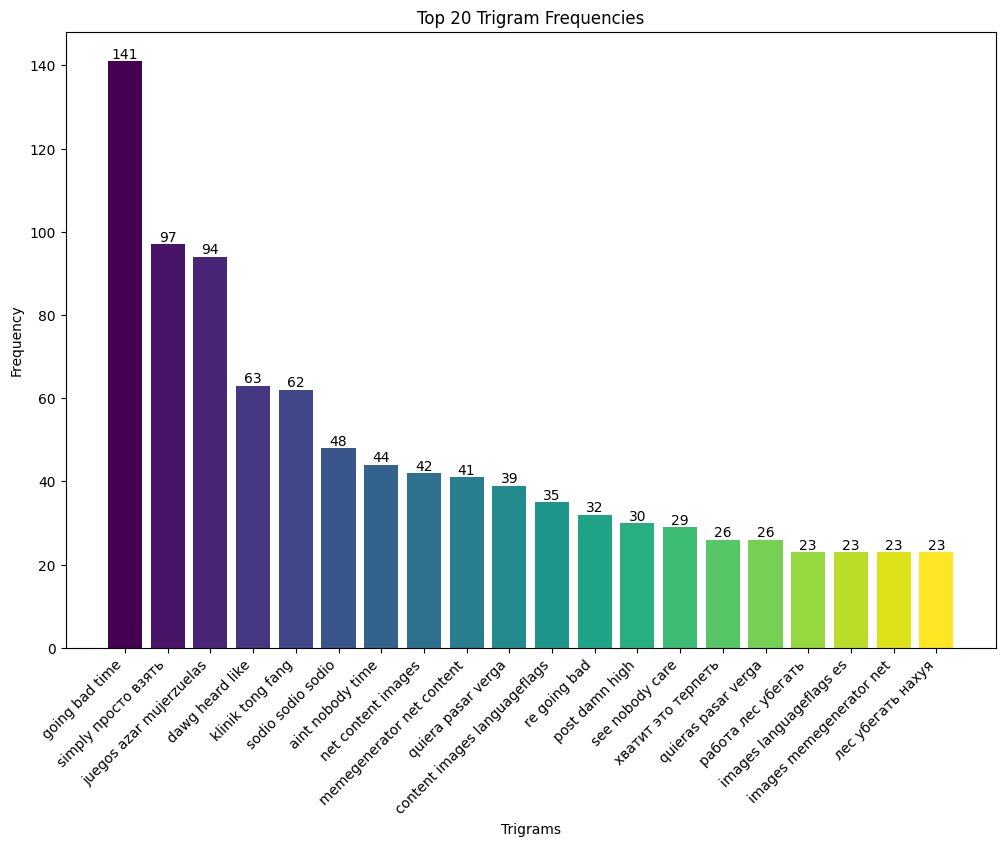

In [ ]:
# Sum up all the columns to get the frequency of each trigram across all documents
trigram_frequencies = DTM_trigram.sum().sort_values(ascending=False)

# If there are too many trigrams, you might want to limit to the top 20 for a clearer visualization
top_trigrams = trigram_frequencies.head(20)

# Create a bar chart for the trigrams
plt.figure(figsize=(12, 8))
bars = plt.bar(top_trigrams.index, top_trigrams.values, color=plt.cm.viridis(np.linspace(0, 1, len(top_trigrams))))

# Adding numeric labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=10, color='black')

# Customize chart visuals
plt.title('Top 20 Trigram Frequencies')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Show the plot
plt.show()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,confusion_matrix

analyser = SentimentIntensityAnalyzer()

def vader_class_prediction(score):

    sentiment_dict = analyser.polarity_scores(score)

    if sentiment_dict['compound'] >= 0.01 :
        vader_class = "Positive"

    elif sentiment_dict['compound'] <= - 0.01 :
        vader_class = "Negative"

    else :
        vader_class = "Neutral"
    return vader_class


def get_vader_sentiment_score(text):
    return analyser.polarity_scores(text)['compound']
df['vader_score'] = df['Alternative_Text'].apply(get_vader_sentiment_score)
df['prediction'] = df['Alternative_Text'].apply(vader_class_prediction)

In [ ]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
df['encoded_classes'] = l.fit_transform(df['prediction'])

In [ ]:
# Save the DataFrame to a CSV file
output_file = "model_predictions.csv"
df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")

Predictions saved to model_predictions.csv


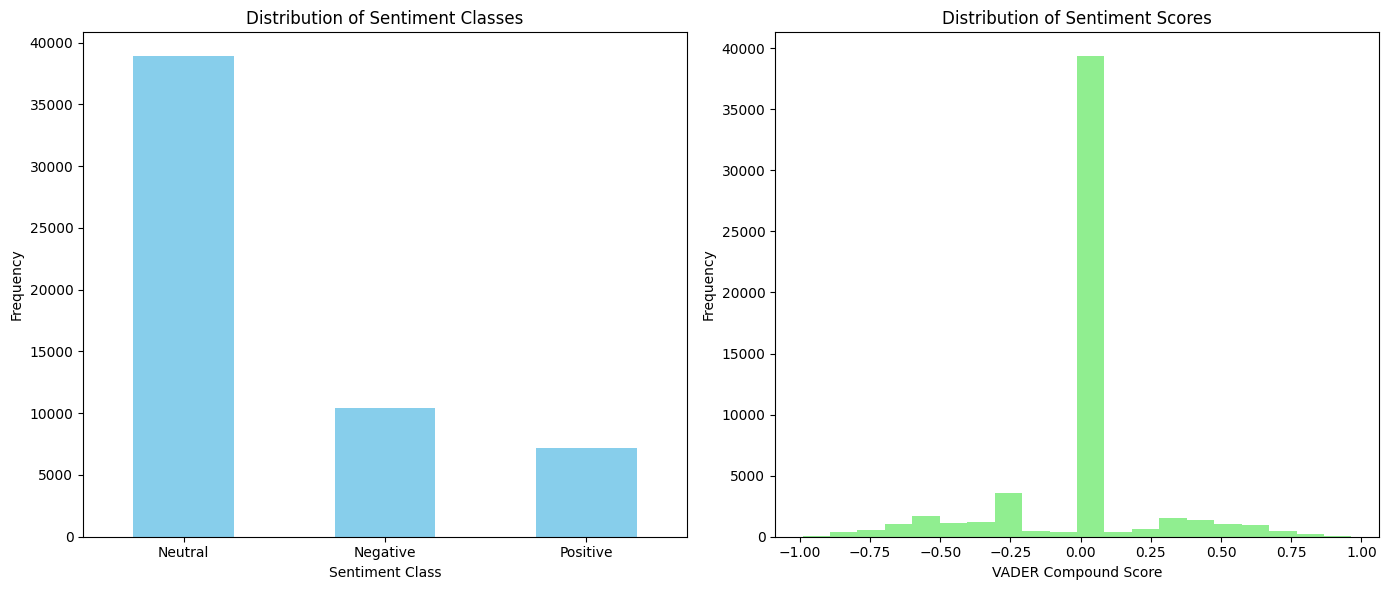

In [ ]:
import matplotlib.pyplot as plt

# Ensure your DataFrame is defined and has the required columns.
# Here's an example DataFrame creation, replace it with your actual DataFrame usage.
# df = pd.DataFrame({
#     'Alternative_Text': ["I love this product!", "This is the worst experience ever.", "Nothing special, quite ordinary."],
# })

# Apply sentiment analysis - Assuming this is already done as per your script
# df['vader_score'] = df['Alternative_Text'].apply(get_vader_sentiment_score)
# df['prediction'] = df['Alternative_Text'].apply(vader_class_prediction)

# Create a bar graph for sentiment distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for sentiment class distribution
df['prediction'].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Sentiment Classes')
ax[0].set_xlabel('Sentiment Class')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

# Plot for sentiment score distribution
df['vader_score'].plot(kind='hist', bins=20, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Sentiment Scores')
ax[1].set_xlabel('VADER Compound Score')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({
#     'Alternative_Text': ["I love this product!", "This is the worst experience ever.", "Nothing special, quite ordinary."],
#     'Label': ["Positive", "Negative", "Neutral"]
# })

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['encoded_classes'], test_size=0.2, random_state=42)

# Defining n-grams configurations
n_grams = [(1, 1), (2, 2), (3, 3)]
results = []

# Function to perform training and evaluation
def train_evaluate_model(ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=5000)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'Naive Bayes': MultinomialNB()
    }

    for name, model in models.items():
        model.fit(X_train_vec, y_train)
        predictions = model.predict(X_test_vec)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
        recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
        f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
        cm = confusion_matrix(y_test, predictions)

        results.append({
            'Model': name,
            'N-Gram Range': ngram_range,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

# Training and evaluating models with different n-grams
for ngram in n_grams:
    train_evaluate_model(ngram)

# Output the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"N-Gram Range: {result['N-Gram Range']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n")

Model: Random Forest
N-Gram Range: (1, 1)
Accuracy: 0.832256351243693
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
Confusion Matrix:
[[1103  848  177]
 [ 412 7275  108]
 [ 116  234 1024]]


Model: SVM
N-Gram Range: (1, 1)
Accuracy: 0.8350004425953793
Precision: 0.84
Recall: 0.84
F1 Score: 0.81
Confusion Matrix:
[[ 856 1145  127]
 [  36 7729   30]
 [  86  440  848]]


Model: Naive Bayes
N-Gram Range: (1, 1)
Accuracy: 0.7947242630786935
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Confusion Matrix:
[[ 995  889  244]
 [ 349 7026  420]
 [ 168  249  957]]


Model: Random Forest
N-Gram Range: (2, 2)
Accuracy: 0.733292024431265
Precision: 0.72
Recall: 0.73
F1 Score: 0.67
Confusion Matrix:
[[ 337 1728   63]
 [  80 7660   55]
 [  75 1012  287]]


Model: SVM
N-Gram Range: (2, 2)
Accuracy: 0.7314331238381871
Precision: 0.74
Recall: 0.73
F1 Score: 0.66
Confusion Matrix:
[[ 302 1785   41]
 [  47 7718   30]
 [  57 1074  243]]


Model: Naive Bayes
N-Gram Range: (2, 2)
Accuracy: 0.7370098256174206
Preci

In [ ]:
import joblib
vectorizer = CountVectorizer(ngram_range=(1,1), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vec, y_train)
joblib.dump(model, 'RF_model.pkl')

['RF_model.pkl']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# Define the ngram range
ngram_range = (1, 1)

# Initialize the CountVectorizer with the specified ngram_range and a limit on the number of features
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)

# Save the vectorizer and transformed data to disk
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('X_train_vec.pkl', 'wb') as f:
    pickle.dump(X_train_vec, f)


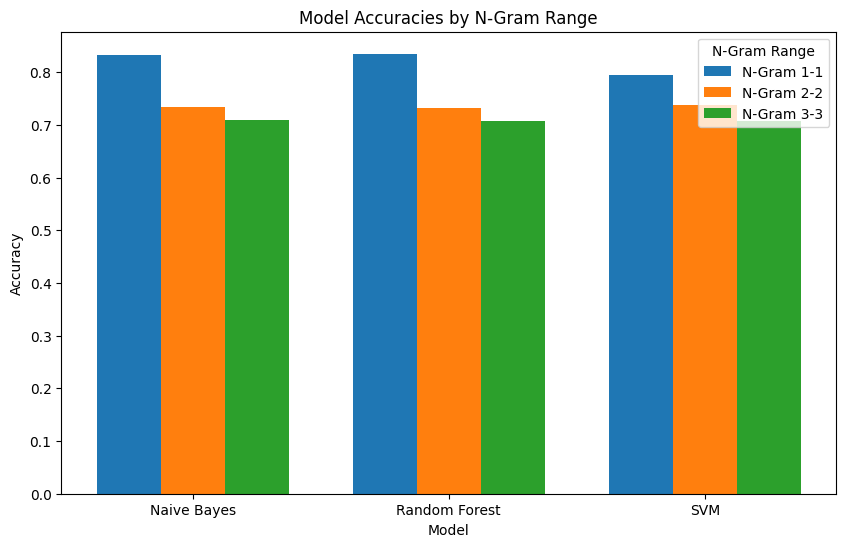

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `results` is a list of dictionaries as described
# Extract data for plotting
model_names = sorted(set(result['Model'] for result in results))
ngram_labels = ["-".join(map(str, result['N-Gram Range'])) for result in results if result['Model'] == model_names[0]]

accuracy_data = {ngram: [] for ngram in ngram_labels}
for ngram in ngram_labels:
    for result in results:
        if "-".join(map(str, result['N-Gram Range'])) == ngram:
            accuracy_data[ngram].append(result['Accuracy'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # Width of the bars

# Position of bars for each model
positions = np.arange(len(model_names))

for i, ngram in enumerate(ngram_labels):
    ax.bar(positions + width*i,
           accuracy_data[ngram],
           width,
           label=f'N-Gram {ngram}')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies by N-Gram Range')
ax.set_xticks(positions + width*(len(ngram_labels)-1)/2)
ax.set_xticklabels(model_names)
ax.legend(title="N-Gram Range")

plt.show()

In [ ]:
# Install Tesseract-OCR in Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

# You can also install a specific language pack if needed
# !sudo apt-get install tesseract-ocr-[lang]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,915 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
from PIL import Image
import pytesseract
import torchvision.transforms as T
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pickle
import joblib

nltk.download('vader_lexicon')

with open("vectorizer.pkl", "rb") as file:
    vectorizer = pickle.load(file)

# Initialize the object detection model
model_2 = fasterrcnn_resnet50_fpn(pretrained=True)
model_2.eval()

# Transformation to convert the image to a tensor
transform = T.Compose([T.ToTensor()])

def extract_text_from_image(image_path):
    """
    Extracts text from an image using Tesseract OCR.
    """
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text.strip()

def detect_objects(image_path):
    """
    Detects objects in an image using a pre-trained Faster R-CNN model.
    """
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        predictions = model_2(image_tensor)
    return predictions[0]

def get_object_names(predictions):
    """
    Converts object class IDs to human-readable names and filters by confidence.
    """
    # Load labels from torchvision or define your own
    COCO_CLASSES = [
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush','flower', 'human'
    ]
    objects = []
    for label, score in zip(predictions['labels'], predictions['scores']):
        if score > 0.8:  # Only consider detections with high confidence
            objects.append(COCO_CLASSES[label.item()] + f" ({score:.2f})")
    return objects

def convert_text_to_vector(text):
    """
    Converts text to a vector using a pre-trained TfidfVectorizer.
    """
    vector = vectorizer.transform([text])
    return vector.toarray()

# Modify the get_summary function to use the convert_text_to_vector function
def get_summary(text, objects):
    """
    Generates a summary by combining object detection and text vectorization.
    """
    model = joblib.load('RF_model.pkl')
    text_vector = convert_text_to_vector(text)
    text_vector = model.predict(text_vector)
    vector_summary = f"Text Vector: {text_vector}"
    print(vector_summary)
    if text_vector == [1]:
        return f'Positive'
    elif text_vector == [0]:
        return f'Negative'
    return f'Neutral'
def main(image_path):
    """
    Main function to process the meme image.
    """
    print("Processing the image...")
    text = extract_text_from_image(image_path)
    predictions = detect_objects(image_path)
    objects = get_object_names(predictions)

    if text or objects:
        summary = get_summary(text, objects)
        print(f"Summary of the Meme: {summary}")
    else:
        print("No significant text or objects detected in the image.")

# Replace 'meme_image.jpg' with the path to your meme image
image_path = 'positive.jpeg'
main(image_path)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Processing the image...
Text Vector: [1]
Summary of the Meme: Positive


Length of y_test_binary: 11297
Shape of X_test_vec: (11297, 5000)
Lengths are consistent. Proceeding with ROC curve calculation.


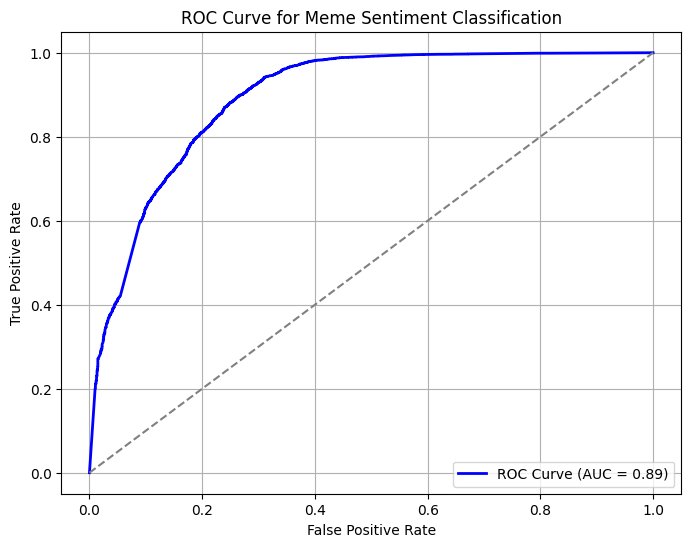

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure consistent splitting of data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['encoded_classes'], test_size=0.2, random_state=42)

# Transform the test data using the pre-trained vectorizer
X_test_vec = vectorizer.transform(X_test)

# Instead of label_binarize and ravel, create a binary target for the Positive class directly:
y_test_binary = (y_test == 1).astype(int)  # Assuming class 1 represents Positive

# Ensure consistency
print(f"Length of y_test_binary: {len(y_test_binary)}")
print(f"Shape of X_test_vec: {X_test_vec.shape}")

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test_vec)[:, 1]  # Probabilities for Positive class (class 1)

# Check if the lengths now match
if len(y_test_binary) != len(y_prob):
    print("Mismatch still exists! Double-check data preprocessing.")
else:
    print("Lengths are consistent. Proceeding with ROC curve calculation.")

# Compute ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Meme Sentiment Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()